# Simulating Moving Objects

Note that the first few sections are not run in the Jupyter notebook.  You can rund `asteroids.py` from the command line and view that file directly in a text editor.

## Digging deeper into Euler’s method

In [9]:
t = 0
s = (0,0)
v = (1,0)
a = (0,0.2)

In [10]:
dt = 2
steps = 5

In [11]:
from vectors import add, scale
positions = [s]
for _ in range(0,5):
    t += 2
    s = add(s, scale(dt,v)) 
    v = add(v, scale(dt,a)) 
    positions.append(s)

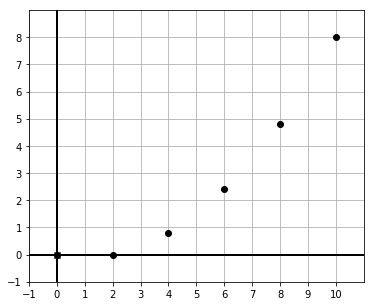

In [14]:
from draw2d import *
draw2d(Points2D(*positions), save_as='9.05.svg')

In [54]:
draw2d(Arrows2D(*positions), save_as='9.06.svg')

NameError: name 'Arrows2D' is not defined

In [17]:
def pairs(lst):
    return list(zip(lst[:-1],lst[1:]))

def eulers_method(s0,v0,a,total_time,step_count):
    positions = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        s = add(s,scale(dt,v))
        v = add(v,scale(dt,a))
        positions.append(s)
    return positions

approx5 = eulers_method((0,0),(1,0),(0,0.2),10,5)
approx10 = eulers_method((0,0),(1,0),(0,0.2),10,10)
approx100 = eulers_method((0,0),(1,0),(0,0.2),10,100)
approx1000 = eulers_method((0,0),(1,0),(0,0.2),10,1000)



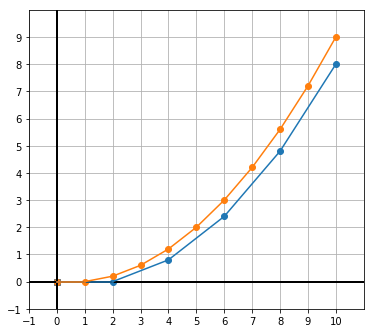

In [19]:
from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    save_as='9.07.svg'
    )



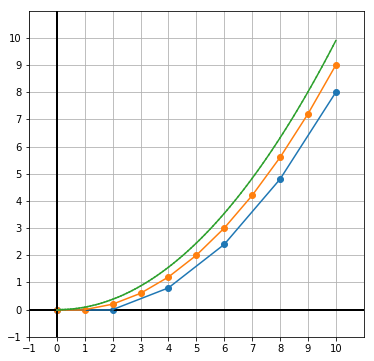

In [27]:

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    origin=False,
    save_as='9.08.svg'
    )

# draw2d(
#     Points2D(*approx5, color='C0'),
#     *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
#     Points2D(*approx10, color='C1'),
#     *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
#     *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
#     *[Segment2D(t,h,color='C3') for (h,t) in pairs(approx1000)],
    

#     )

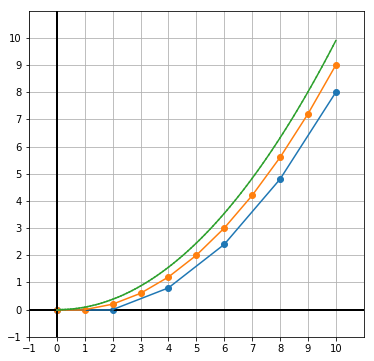

In [28]:

draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='C2') for (h,t) in pairs(approx100)],
    origin=False,
    save_as='9.09.svg'
    )

In [29]:
def eulers_method_overapprox(s0,v0,a,total_time,step_count):
    trajectory = [s0]
    s = s0
    v = v0
    dt = total_time/step_count
    for _ in range(0,step_count):
        v = add(v,scale(dt,a))
        s = add(s,scale(dt,v))
        trajectory.append(s)
    return trajectory


In [31]:
over = eulers_method_overapprox((0,0),(1,0),(0,0.2),10,10)

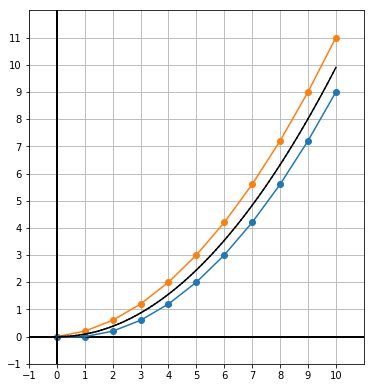

In [36]:
draw2d(
    Points2D(*over, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(over)],
    Points2D(*approx10, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx10)],
    *[Segment2D(t,h,color='k') for (h,t) in pairs(approx100)],
    origin=False,
    save_as='MINI_PROJ_9.3.svg'
    )

In [45]:
def trajectory(ss, points=True, color='C0'):
    for (h,t) in pairs(ss):
        yield Segment2D(t,h,color=color)
    if points:
        yield Points2D(*ss,color=color)

def plot_trajectory(s0,v0,a,t,n,**kwargs):
    draw2d(*[Segment2D(t,h,color='C0') for (h,t) in pairs(eulers_method(s0,v0,a,t,n))], **kwargs)

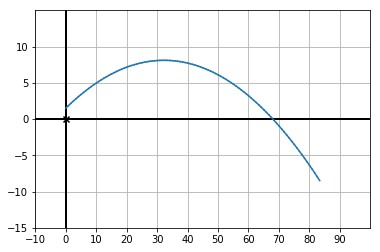

In [49]:
from math import pi,sin,cos
def baseball_trajectory(degrees):
    radians = degrees * pi/180
    s0 = (0,1.5)
    v0 = (30*cos(radians),30*sin(radians))
    a = (0,-9.81)
    return eulers_method(s0,v0,a,3,100)
draw2d(
    *trajectory(baseball_trajectory(22), points=False), 
    grid=(10,5), 
    nice_aspect_ratio=False,
    save_as="MINI_PROJECT_9.4.svg")

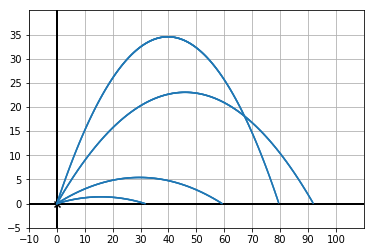

In [50]:
def baseball_trajectory(degrees):
    radians = degrees * pi/180
    s0 = (0,0)
    v0 = (30*cos(radians),30*sin(radians))
    a = (0,-9.81)
    return [(x,y) for (x,y) in eulers_method(s0,v0,a,10,1000) if y>=0]

draw2d(
    *trajectory(baseball_trajectory(10), points=False),
    *trajectory(baseball_trajectory(20), points=False),
    *trajectory(baseball_trajectory(45), points=False),
    *trajectory(baseball_trajectory(60), points=False), 
    grid=(10,5), nice_aspect_ratio=False,
    save_as='MINI_PROJECT_9.5.svg'
)

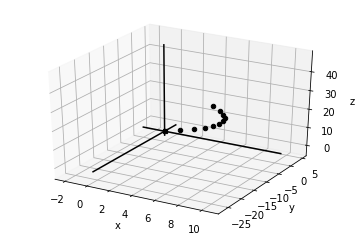

In [53]:
from draw3d import *
traj3d = eulers_method((0,0,0), (1,2,0), (0,-1,1), 10, 10)
draw3d(
    Points3D(*traj3d),
    save_as='MINI_PROJECT_9.6.svg'
)